## ARIMA MODEL

In [7]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
%matplotlib inline
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

AttributeError: module 'numpy' has no attribute 'version'

In [2]:
#Cargando la data
data=pd.read_csv('petroleo.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105 entries, 0 to 4104
Data columns (total 7 columns):
fecha       4105 non-null object
ultimo      4105 non-null float64
apertura    4105 non-null float64
maximo      4105 non-null float64
minimo      4105 non-null float64
vol         4105 non-null object
var         4105 non-null float64
dtypes: float64(5), object(2)
memory usage: 224.6+ KB


In [8]:
#Seteando fecha como indice
data['fecha'] = pd.to_datetime(data.fecha,format='%d.%m.%Y')
data.index = data['fecha']
data = data.sort_index(ascending=True, axis=0)
data.head()

,fecha,ultimo,apertura,maximo,minimo,vol,var
fecha,,,,,,,
2002-12-19,2002-12-19,30.56,30.40,31.10,30.15,36.63e3,0.39
2002-12-20,2002-12-20,30.30,30.25,30.38,29.86,83.45e3,-0.85
2002-12-23,2002-12-23,31.75,30.41,31.95,30.41,68.87e3,4.79
2002-12-24,2002-12-24,31.97,31.85,32.03,31.62,34.81e3,0.69
2002-12-26,2002-12-26,32.49,31.63,32.55,31.42,41.15e3,1.63


In [17]:
from pmdarima.arima import auto_arima

df = data.sort_index(ascending=True, axis=0)

train = df[:3827]
valid = df[3827:]

training = train['ultimo']
validation = valid['ultimo']

In [18]:
train.head()

,fecha,ultimo,apertura,maximo,minimo,vol,var
fecha,,,,,,,
2002-12-19,2002-12-19,30.56,30.40,31.10,30.15,36.63e3,0.39
2002-12-20,2002-12-20,30.30,30.25,30.38,29.86,83.45e3,-0.85
2002-12-23,2002-12-23,31.75,30.41,31.95,30.41,68.87e3,4.79
2002-12-24,2002-12-24,31.97,31.85,32.03,31.62,34.81e3,0.69
2002-12-26,2002-12-26,32.49,31.63,32.55,31.42,41.15e3,1.63


In [19]:
valid.head()

,fecha,ultimo,apertura,maximo,minimo,vol,var
fecha,,,,,,,
2018-01-01,2018-01-01,60.24,60.26,60.28,60.15,-,-0.30
2018-01-02,2018-01-02,60.37,60.20,60.74,60.10,510.31e3,0.22
2018-01-03,2018-01-03,61.63,60.39,61.97,60.28,673.86e3,2.09
2018-01-04,2018-01-04,62.01,61.96,62.21,61.59,654.36e3,0.62
2018-01-05,2018-01-05,61.44,61.90,62.04,61.09,563.04e3,-0.92


In [21]:
# Fit model
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3,start_P=0,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=len(validation))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediccion'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=14056.000, BIC=14080.998, Fit time=1.200 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=14063.159, BIC=14075.658, Fit time=0.096 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=14055.707, BIC=14074.456, Fit time=0.553 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=14055.194, BIC=14073.943, Fit time=0.289 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=14055.157, BIC=14080.155, Fit time=1.042 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=14055.438, BIC=14092.935, Fit time=1.661 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=14058.548, BIC=14089.796, Fit time=1.590 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=14056.661, BIC=14087.909, Fit time=0.788 seconds
Total fit time: 7.261 seconds


In [22]:
# Calculando RMS
rms=np.sqrt(np.mean(np.power((np.array(valid['ultimo'])-np.array(forecast['Prediccion'])),2)))
rms

8.041102979877344

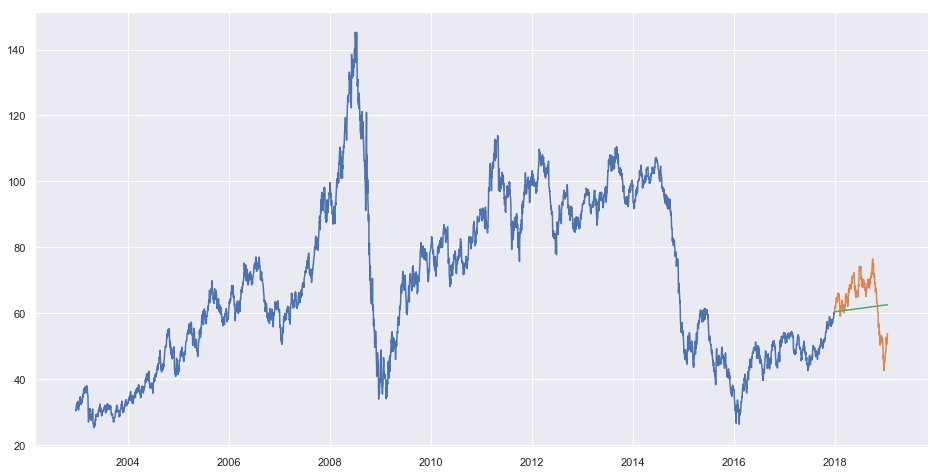

In [24]:
#plot
plt.figure(figsize=(16,8))
plt.plot(train['ultimo'])
plt.plot(valid['ultimo'])
plt.plot(forecast['Prediccion'])

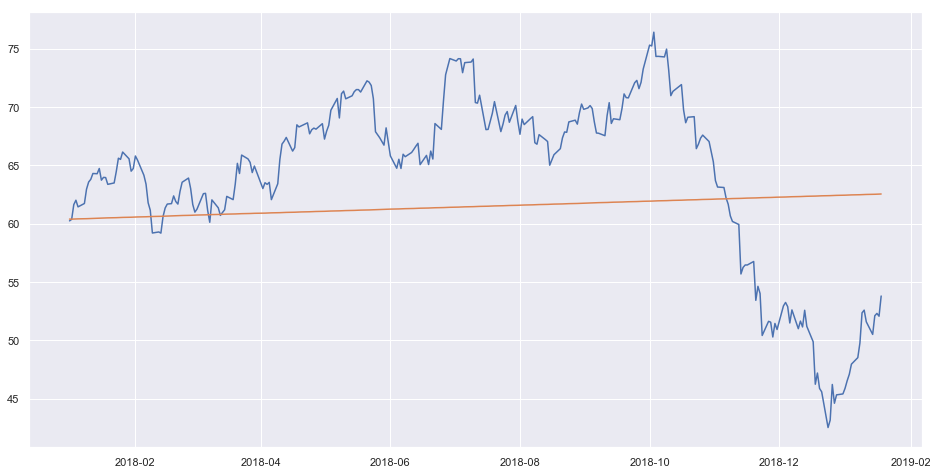

In [29]:
#Gráfica del outcome original y del outcome predicho
plt.figure(figsize=(16,8))
plt.plot(valid['ultimo'])
plt.plot(forecast['Prediccion'])

## LSTM DEEP NEURAL NETWORK

In [1]:
# Importando librerias
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of C:\Users\marce\Anaconda3\lib\site-packages\sklearn\__check_build:
setup.py                  _check_build.cp37-win_amd64.pyd__init__.py
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [65]:
#creando data frame
df = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['fecha', 'ultimo'])
for i in range(0,len(df)):
    new_data['fecha'][i] = data['fecha'][i]
    new_data['ultimo'][i] = data['ultimo'][i]

#setting index
new_data.index = new_data.fecha
new_data.drop('fecha', axis=1, inplace=True)

#train and validation set
dataset = new_data.values
train = dataset[0:278,:]
valid = dataset[278:,:]
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

C:\Users\marce\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
